# Supermarket Sales EDA
Hello again, here's another data analysis project of mine. I've gotten a bit better using seaborn now and a lot of the plots here are using seaborn plots. Overall experience with working on this dataset has been good as well as the data is relatively clean already but the whole analysis process for me was easier as I generally knew what to do. 

I still had to Google and research a lot of code that I could use especially for the last graph on date time. It's still a bit of a struggle for me to work with those data ypes but I would assume other people would also find it difficult as date and time can be pretty confusing.

In [1]:
# Loading packages/modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
from datetime import datetime, timedelta
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# setting the default plot design
sns.set()

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


In [2]:
# Loading dataframe
df = pd.read_csv('../input/supermarket-sales/supermarket_sales - Sheet1.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [3]:
# Setting up Time for analysis later
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

# Converting date time to day of week
df['Day_name'] = df['Date'].dt.day_name()
df['Day_number'] = df['Date'].dt.dayofweek
df = df.sort_values(['Day_number', 'Date'])

df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day_name,Day_number
35,232-16-2483,C,Naypyitaw,Member,Female,Sports and travel,68.12,1,3.4060,71.5260,2019-01-07,2022-09-12 12:28:00,Ewallet,68.12,4.761905,3.4060,6.8,Monday,0
67,109-28-2512,B,Mandalay,Member,Female,Fashion accessories,97.61,6,29.2830,614.9430,2019-01-07,2022-09-12 15:01:00,Ewallet,585.66,4.761905,29.2830,9.9,Monday,0
248,799-71-1548,A,Yangon,Member,Male,Electronic accessories,77.72,4,15.5440,326.4240,2019-01-07,2022-09-12 16:11:00,Credit card,310.88,4.761905,15.5440,8.8,Monday,0
272,126-54-1082,A,Yangon,Member,Female,Home and lifestyle,21.54,9,9.6930,203.5530,2019-01-07,2022-09-12 11:44:00,Credit card,193.86,4.761905,9.6930,8.8,Monday,0
275,566-19-5475,B,Mandalay,Normal,Male,Fashion accessories,47.97,7,16.7895,352.5795,2019-01-07,2022-09-12 20:52:00,Cash,335.79,4.761905,16.7895,6.2,Monday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,725-67-2480,B,Mandalay,Member,Female,Fashion accessories,58.75,6,17.6250,370.1250,2019-03-24,2022-09-12 18:14:00,Credit card,352.50,4.761905,17.6250,5.9,Sunday,6
828,538-22-0304,C,Naypyitaw,Normal,Male,Electronic accessories,64.95,10,32.4750,681.9750,2019-03-24,2022-09-12 18:27:00,Cash,649.50,4.761905,32.4750,5.2,Sunday,6
905,118-62-1812,C,Naypyitaw,Member,Female,Home and lifestyle,78.38,4,15.6760,329.1960,2019-03-24,2022-09-12 17:56:00,Cash,313.52,4.761905,15.6760,7.9,Sunday,6
907,851-98-3555,B,Mandalay,Normal,Female,Health and beauty,82.88,5,20.7200,435.1200,2019-03-24,2022-09-12 14:08:00,Credit card,414.40,4.761905,20.7200,6.6,Sunday,6


In [4]:
# Most basic statistical info we can get from the dataset
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day_number
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270,3.032000
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858,1.973543
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000,0.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000,1.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000,3.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000,5.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000,6.000000


### Initial Thoughts

We can see that the average amount sold any City branch is around 322 Myanmar kyat. We're assuming that is the currency since the cities Naypyitaw, Mandalay and Yangon are all located in Myanmar. The a good range of the price of total amount spent by customers is 124 - 471 Myanmar kyat.

### Total Sales across the branches

We can see that the total sales of all city branches are relatively even with Naypyitaw coming out ahead. This is not surprising as it is also the capital of Myanmar.

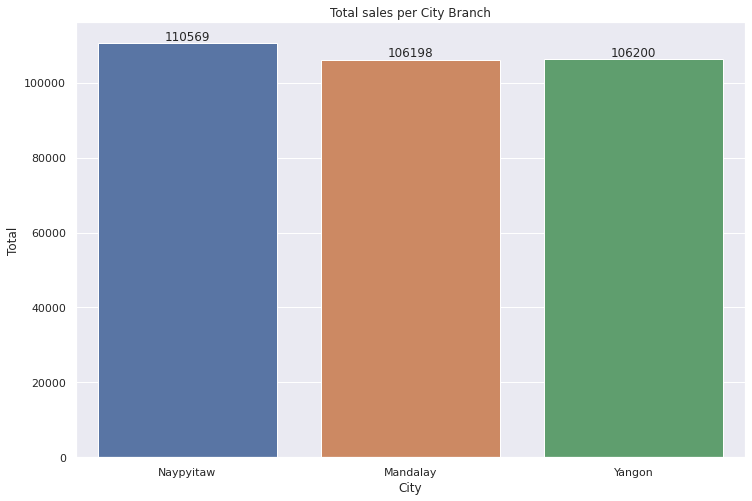

In [5]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data = df, x = 'City', y = 'Total', estimator = sum, ci = None)
plt.title('Total sales per City Branch')
ax.bar_label(ax.containers[0])
plt.show()

### Product line sales per branch
Yangon branch generally has an even spread of sales of all different category types, although Health and Beauty are not performing as well compared to other product lines.

Naypyitaw excels in the Food and beverages and Fashion accessories product line and Mandalay Excels in Sports and Travel and Fashion Accessories.

Let's take a further look on how the spending habits of Male and Female is distributed amongst the categories per City branch.

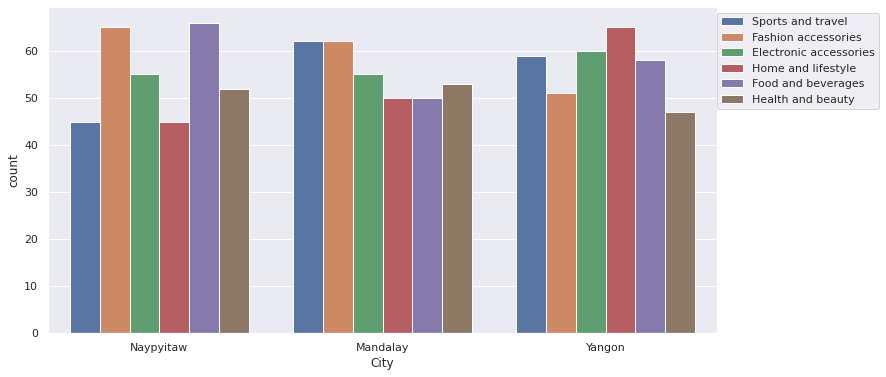

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(data = df, x = 'City', hue = 'Product line')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.25,1))
plt.show()

### Gender spending habits per branch
We can see that in Yangon that the top two categories for females are Home and lifestyle and Electronic Accessories while for males the highest performing one is Sports and Travel.

For Naypyitaw, it's a different story where females generally spend more on Sports and Food while males focuse more on health and electronics..

Lastly, for Mandalay the two highest categories for female and male is Home and lifestyle and health and beauty respectively.

The differences in spending habits in both genders may be attributed to the lifestyle of the cities that they are in. For example, Naypyitaw may have a more active lifestyle for female customers as they tend to spend more on Sports and foods. While Yangon female customers may be more homebodies as they tend to sepnd more on home and electronic accessories. 

<Figure size 1152x720 with 0 Axes>

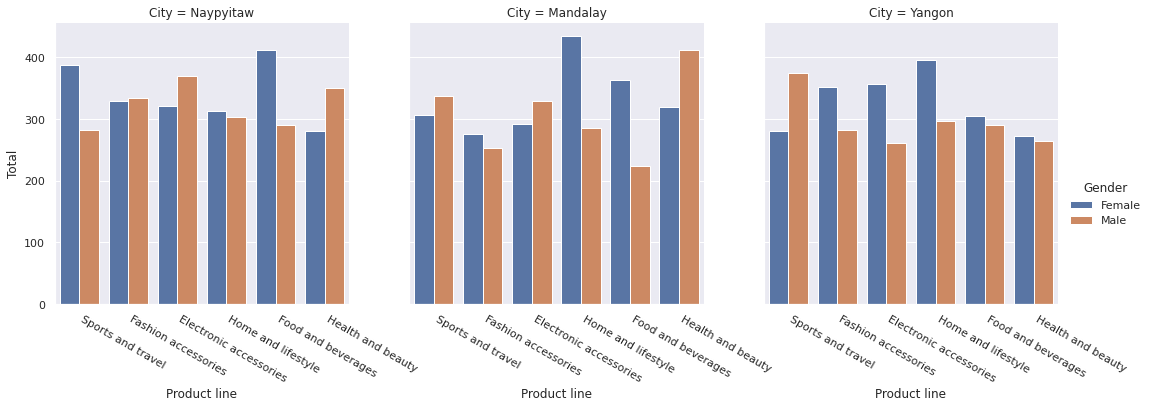

In [7]:
plt.figure(figsize=(16,10))
g = sns.catplot(data = df, x = 'Product line',y = 'Total', hue = 'Gender', col = 'City', kind = 'bar', ci = None)
g.set_xticklabels(rotation=-30,horizontalalignment='left')
plt.show()

### Customer payment preferences per branch
We can see that Yangon and Naypyitaw branch have the most number of Ewallet and Cash payment respectively. It may be a good idea to give discounts or promos based on the payment type that customers use.

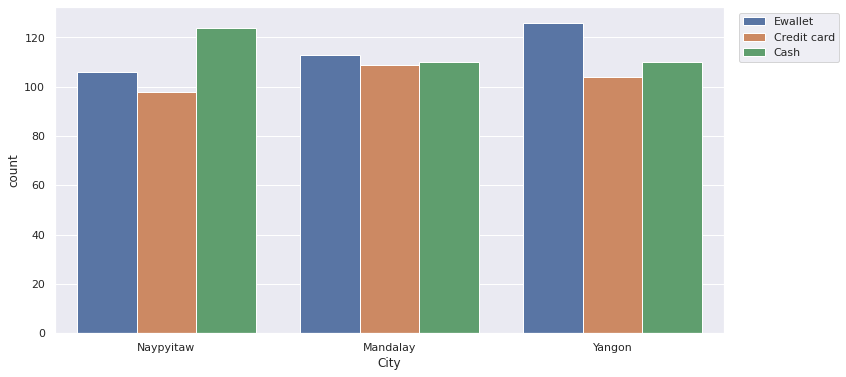

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(data = df, x = 'City', hue = 'Payment')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.18,1))
plt.show()

### Daily Sales Performance
We can see that the highest performing day is unsurprisngly Saturday as this most likely is the time that people are able to go to the Supermarket and buy all of their needs. Monday falls as the lowest performing day. This is also makes sense as it is generally the start of the week and people will most likely have to go to their jobs or school. What's most surprising is that the 2nd highest performing day is actually Tuesday. A possible reason would be that after doing people have done their initial responsbilities on a Monday, they might have more time to go on a Tuesday where it may generally be more favorable for them as well since they would not have to compete with other people during the weekends.

We can also see a further breakdown on the general spending trends per city. Surprisingly, Mandalay takes the 2 highest spots for Saturday and Tuesday. It also takes the lowest spot on for Sunday. This could be because people have already spent their money during Saturday, there would be no need to come back again on a Sunday. 

For Naypyitaw, it lookes like that weekends are performing as expected but also Tuesdays and Wednesdays as well. Since it's the capital, there may be more incentive for people to buy during midweek as they all may be doing so since they are at the city center during work days.

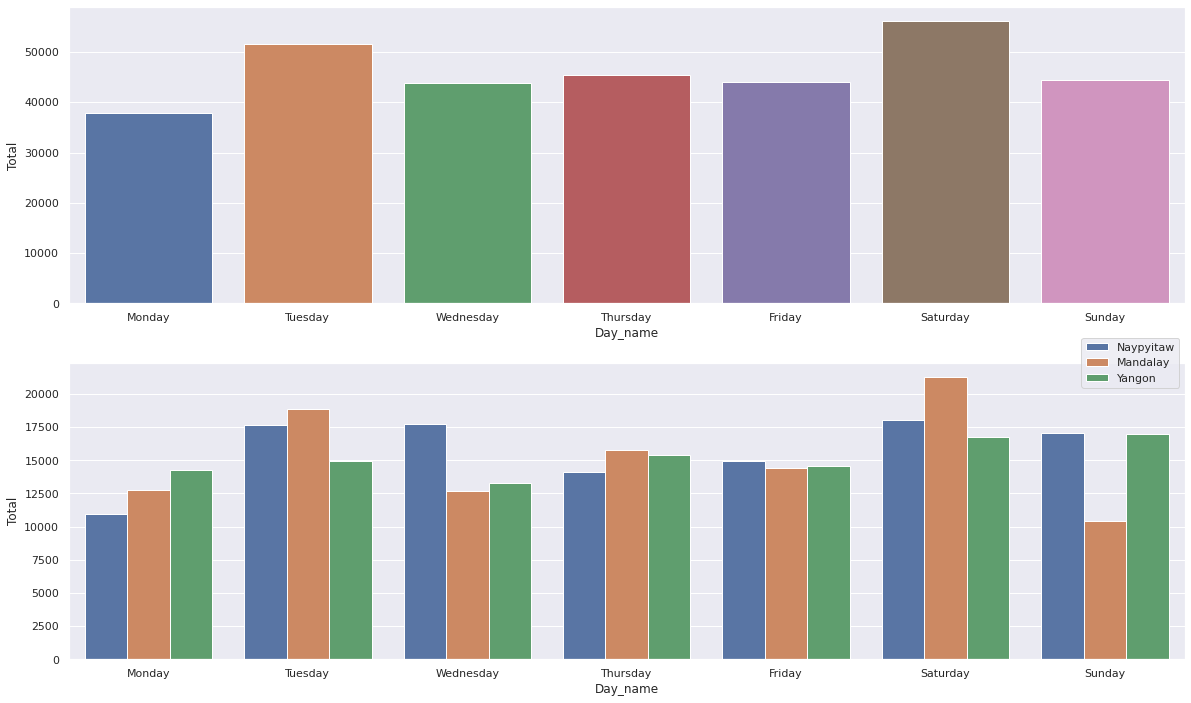

In [9]:
# Plotting a subplot with 2 rows
fig, axes = plt.subplots(nrows=2, figsize=(20,12))

# Plotting each graph to a respective axis
sns.barplot(x = 'Day_name', y = 'Total', data = df, estimator = sum, ax = axes[0], ci = False)
sns.barplot(x = 'Day_name', y = 'Total', data = df, estimator = sum, hue = 'City', ax = axes[1], ci = False)

# Moving the legend to a better location
axes[1].legend(loc='right',bbox_to_anchor = (1,1))

plt.show()

### Rating distrubition of member type per city branch
We can see that generally all customers regardless of member type have a similar rating for each supermarket branch. Although we can see the density curve of the member type customers in Mandalay is bigger near the lower end of the rating so that city may not be performing as well as it might be doing.

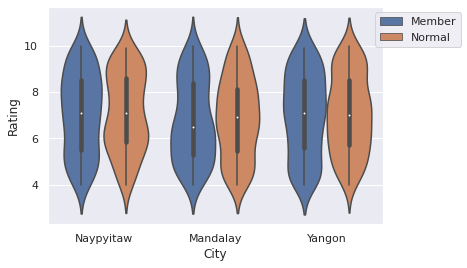

In [10]:
# Plotting Violin Plot
sns.violinplot(x = 'City', y = 'Rating', data = df, hue = 'Customer type')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.25,1))

### Rating performance throughout the operating hours
Initially, I was looking for a way to visualize the rating performance at each hour when the customers buy at the supermarket. This is the easiest solution I could come up with at this moment based on what I have found so far. I had a lot of difficulties working on datetime data type objects and I would assume this is also a big hurdle for other analysts as date and time can be very confusing to manipulate.

So for now, I found the resample() function which helped get the data I needed on a 30 minute time frame interval. 

In [11]:
# Getting the mean rating of customers per 30 minute time interval
time_rating = df.resample('30T', on='Time').Rating.mean()

# Transforming series to a dataframe
time_rating = time_rating.to_frame().reset_index()

# Changing the Time to a string object and dropping the seconds of the time.
time_rating['Time'] = time_rating['Time'].dt.time.astype(str)
time_rating['Time'] = time_rating['Time'].str[:-3]

time_rating

,Time,Rating
0,10:00,7.016000
1,10:30,7.178431
2,11:00,6.704762
3,11:30,6.895833
4,12:00,7.156410
5,12:30,7.412000
6,13:00,6.937500
7,13:30,7.110909
8,14:00,7.070000
9,14:30,6.809302


For the analysis, we can see that the highest performing times are during lunch time, dinner time and closing time. I would assume that people coming out to buy food and drinks would generally have a good time since they will be enjoying a meal. Closing time also performs well as a possible reason might be that because it is already closing time, there are less people in the supermarket and as such, customers might have a better experience since there are not a lot of other people at the same time.

The lower performing times are just before lunch time and right after dinner time. It may be possible that because the employees are preparing for the lunch rush, they might not be able to serve customers as well as they could especially since the initial prepartion for food is might be harder before lunch time compared to dinner time. And speaking of dinner time, the lowest perfoming time slot is just after dinner. Potential reason might be food running out during this time and employees being exhausted as well after working the whole and as well as the dinner rush.

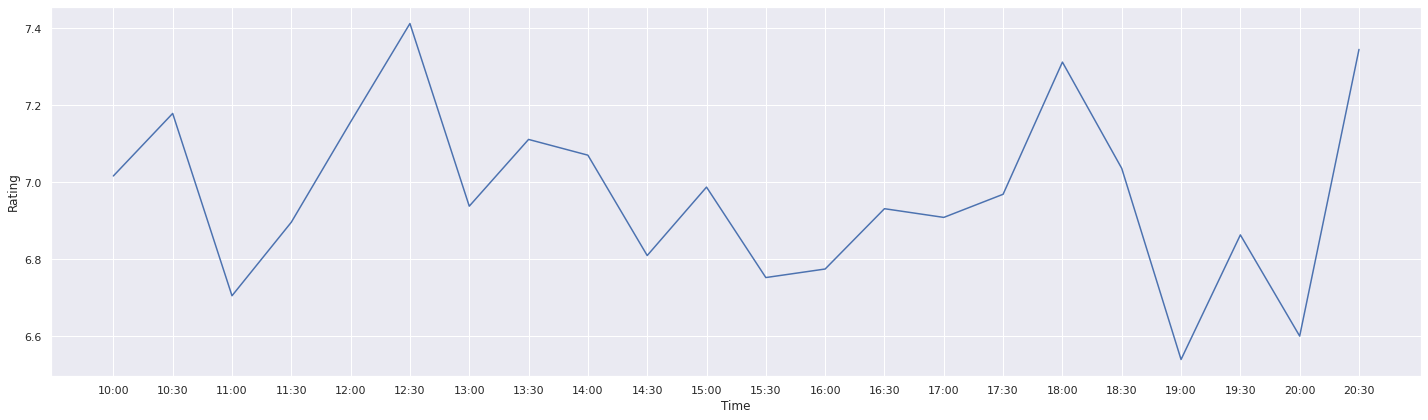

In [12]:
# Plotting for the rating throughout the whole day
plt.figure(figsize=(20,6))
sns.lineplot(x = 'Time', y = 'Rating', data = time_rating)
plt.tight_layout()
plt.show()

# Thank you for reading

If you have comments or suggestions, please feel free to let me know. I would love to get more ideas on how to better analyze these types of data.